# 복습 문제

In [3]:
import pydataset

mpg = pydataset.data('mpg')
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [8]:
pct75 = mpg['cty'].quantile(.75)
pct25 = mpg['cty'].quantile(.25)
print(pct75)
print(pct25)

19.0
14.0


In [10]:
IQR = pct75 - pct25

u_outliers = pct75 + 1.5*IQR
d_outliers = pct25 - 1.5*IQR

print(u_outliers)
print(d_outliers)

26.5
6.5


In [31]:
cond1 = mpg['cty'] <= 6.5
cond2 = mpg['cty'] >= 26.5

mpg[cond1 | cond2][['cty']].count()

cty    5
dtype: int64

<AxesSubplot:xlabel='displ', ylabel='cty'>

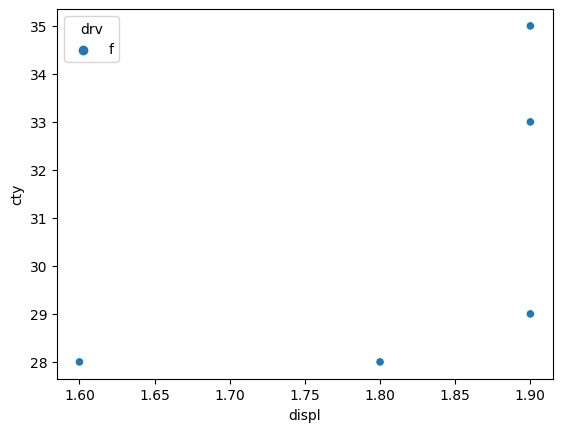

In [35]:
import seaborn as sns
df = mpg.query('cty <= 6.5 | cty >= 26.5')
sns.scatterplot(data = df, x = 'displ', y = 'cty', hue = 'drv')

# 수업

- 그래프를 그렸는데 객체만 저장되고 그래프가 뜨지 않는 경우
- matplotlib.pyplot import해서 아래 코드 실행하면 뜸
- plt.show()

## 인터랙티브 그래프

In [165]:
pip install plotly


     --------------------------------------- 15.2/15.2 MB 21.1 MB/s eta 0:00:00


In [166]:
pip install jupyter-dash

     ---------------------------------------- 9.9/9.9 MB 14.7 MB/s eta 0:00:00
     -------------------------------------- 101.5/101.5 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 96.6/96.6 kB 5.8 MB/s eta 0:00:00
     -------------------------------------- 232.7/232.7 kB 2.9 MB/s eta 0:00:00
     -------------------------------------- 383.3/383.3 kB 7.9 MB/s eta 0:00:00
Using legacy 'setup.py install' for retrying, since package 'wheel' is not installed.
  Running setup.py install for retrying: started
  Running setup.py install for retrying: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


In [192]:
mpg = pydataset.data('mpg')

In [180]:
import plotly.express as px

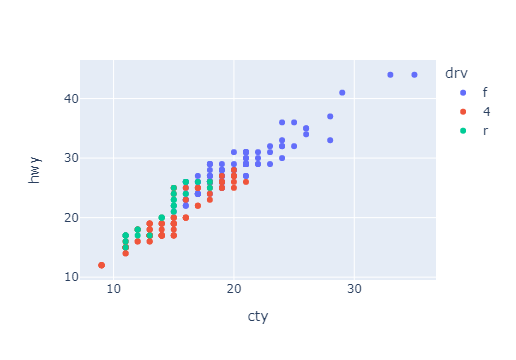

In [178]:
px.scatter(data_frame = mpg, x = 'cty', y = 'hwy', color = 'drv')

In [182]:
df = mpg.groupby('class', as_index = False).agg(n = ('class', 'count'))
df

,class,n
0,2seater,5
1,compact,47
2,midsize,41
3,minivan,11
4,pickup,33
5,subcompact,35
6,suv,62


In [193]:
## 방법 2
df = mpg.groupby('class')[['class']].agg('count')
df.rename({'class' : 'n'}, axis = 1)
df.reset_index()

ValueError: cannot insert class, already exists

In [185]:
import seaborn as sns

<AxesSubplot:xlabel='class', ylabel='count'>

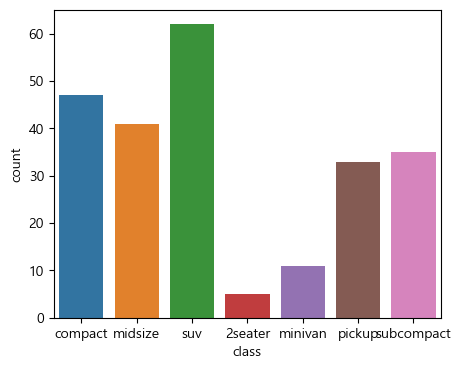

In [249]:
sns.countplot(data = mpg, x = 'class')

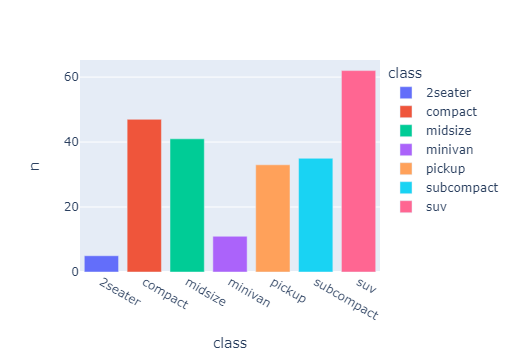

In [183]:
px.bar(data_frame = df, x = 'class', y = 'n', color = 'class')

### 그래프 사이즈 조절하기

In [245]:
plt.rcParams["figure.figsize"] = (5, 4)  ## 한 번 수정하면 계속 해당 사이즈로 나옴

<AxesSubplot:xlabel='class', ylabel='count'>

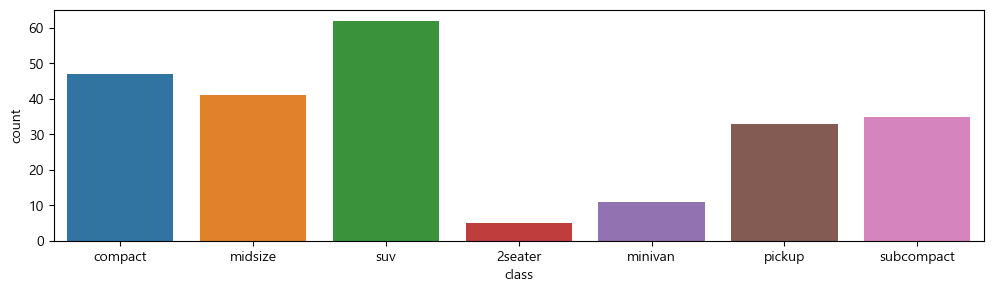

In [251]:
plt.figure(figsize = (12, 3))   ### 해당 그래프 그릴 때 한 번만 적용됨
sns.countplot(data = mpg, x = 'class')

## Python for Analysis

### 문자열 input으로 여러 개 받기

In [257]:
score = input("끝날 때에는 엔터를 치세요").split(" ")

끝날 때에는 엔터를 치세요 80 90 100


In [258]:
score

['80', '90', '100']

### range 함수는 임의 크기로 값을 생성해낼 수 있지만 메모리 사용량은 매우 적다

In [260]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [261]:
range(10)

range(0, 10)

위 2개의 코드는 같지 않음

- range(10) : generator (기계)- 숫자 자체를 저장하고있는 것이 아니라 그 때 그 때 필요한 숫자 불러옴
- [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] : list 안에 많은 숫자들을 저장하기 위해서는 용량이 많이 필요

### 삼항 표현식
- value = true-expre if condition else false-expre

In [265]:
x = 5

'Non-negative' if x >= 0 else 'Negative'

'Non-negative'

### tuple / list

In [270]:
a , (b, c), *d = 1, (2, 3), 4, 5, 6, 7
print(a, ":", b, ":", c, ":", d)

1 : 2 : 3 : [4, 5, 6, 7]


In [272]:
for _ in range(3):
    print("Hello")

Hello
Hello
Hello


- *rest : 함수의 시그니처에서 길이를 알 수 없는 긴 인자를 담기 위한 방법으로 사용됨.
- rest는 필요 없는 값을 무시하기 위해 사용하기도 함.
- 불필요한 변수라는 것을 나타내기 위해 _를 사용하는 관습도 있음

In [319]:
li = []

for i in range(1, 5):
    li.append(i)
    
li

[1, 2, 3, 4]

In [ ]:
## li의 임의의 자리에 word = ['a', 'b', 'c', 'd', 'e']가 끼이도록 만들기
word = ['a', 'b', 'c', 'd', 'e'] 

import random

rn = random.randint(0, len(li))
for i in word:
    li.insert(rn, i)
    
li

In [321]:
seq = [7, 2, 3, 7, 5, 6, 0, 1]
seq[3:4] = [6, 3]
seq

[7, 2, 3, 6, 3, 5, 6, 0, 1]

In [322]:
li = ['a', 'b', 'c']

for i, num in enumerate(li):
    print(i, num)

0 a
1 b
2 c


In [323]:
list(enumerate(['a', 'b', 'c']))

[(0, 'a'), (1, 'b'), (2, 'c')]

In [324]:
dic = {}
for i, letter in enumerate(li):
    dic[i] = letter
dic  ### 1:1대응이므로 dictionary로 만들기도 가능함

{0: 'a', 1: 'b', 2: 'c'}

### zip

In [327]:
pitchers = [('Nolan', 'Ryan'), ('Roger', 'Clemens'), ('Schilling', 'Curt')]

In [328]:
first_names, last_names = zip(*pitchers)

In [329]:
first_names

('Nolan', 'Roger', 'Schilling')

In [330]:
last_names

('Ryan', 'Clemens', 'Curt')

In [331]:
a = [i for i in range(10)]
a

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [334]:
b = [i*2 for i in range(10)]
b

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

In [340]:
dict(zip(a, b))

{0: 0, 1: 2, 2: 4, 3: 6, 4: 8, 5: 10, 6: 12, 7: 14, 8: 16, 9: 18}

In [344]:
df = pd.DataFrame({'A': a, "B" : b})
df

,A,B
0,0,0
1,1,2
2,2,4
3,3,6
4,4,8
5,5,10
6,6,12
7,7,14
8,8,16
9,9,18


In [348]:
dic2 = dict(zip(df['A'], df['B']))
dic2

{0: 0, 1: 2, 2: 4, 3: 6, 4: 8, 5: 10, 6: 12, 7: 14, 8: 16, 9: 18}

### 기본값(104p)

### set

- set( ) : 중복 제거할 때
- {1, 2}.add() : 집합에 원소를 추가할 때 add 사용

In [357]:
### 집합과 random.randint 를 사용하여 중복없이 10개의 20이하의 정수를 만들기
a = set()

while len(a) < 10:
    a.add(random.randint(0, 20))
a

{1, 3, 4, 5, 9, 13, 15, 16, 18, 19}

In [359]:
a = [1, 2, 3]
b = []

for i in a:
    b.append(i*2)
b

[2, 4, 6]

In [362]:
b1 = [i*2 for i in a]
b1

[2, 4, 6]